In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('discogs.csv')

dataset.head()

,id,release_id,status,title,artist_id,artist_name,label_name,label_id,format,genre,style,country,release_date,notes,master_id,video_url,company_name
0,1,12295801,Accepted,The World Of Ray Price,311678,Ray Price,Columbia,1866.0,8-Track Cartridge,"Folk, World, & Country",NaN,US,1970.0,NaN,NaN,NaN,NaN
1,2,12295802,Accepted,The Burden of Isolation,3720243,Filth (9),Not on Label (Filth (9) Self-Released),1495843.0,CD,Rock,Deathcore,US,2018.0,NaN,1397110.0,https://www.youtube.com/watch?v=mRN-e_mIfQQ,NaN
2,3,12295803,Accepted,Bassoon Concertos,6095671,Sebastian Fagerlund,BIS,51038.0,SACD,Classical,Contemporary,Sweden,2016.0,Made in the EU,NaN,NaN,BIS Records AB
3,4,12295805,Accepted,Ich Lag In Einer Nacht Und Schlief,3170804,Hans Peter Treichler,Gold Records,11489.0,Vinyl,Pop,NaN,Switzerland,1980.0,NaN,NaN,NaN,Gold Records
4,5,12295806,Accepted,Bien O Mal,85181,Julieta Venegas,Sony Music,25487.0,CD,Latin,NaN,Argentina,2010.0,NaN,1418114.0,https://www.youtube.com/watch?v=KTr9HMnAWNE,Lolein Music


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16319274 entries, 0 to 16319273
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   release_id    int64  
 2   status        object 
 3   title         object 
 4   artist_id     int64  
 5   artist_name   object 
 6   label_name    object 
 7   label_id      float64
 8   format        object 
 9   genre         object 
 10  style         object 
 11  country       object 
 12  release_date  float64
 13  notes         object 
 14  master_id     float64
 15  video_url     object 
 16  company_name  object 
dtypes: float64(3), int64(3), object(11)
memory usage: 2.1+ GB


In [9]:
dataset.isnull().sum()

id                     0
release_id             0
status                 0
title                273
artist_id              0
artist_name            3
label_name             3
label_id               1
format                 0
genre                  2
style            2616198
country           503086
release_date     2173336
notes            6964674
master_id       14118736
video_url        8613166
company_name     8666021
dtype: int64

In [ ]:
# Percentage of missing values
missing_percentage = dataset.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)


master_id       86.515711
company_name    53.102981
video_url       52.779100
notes           42.677597
style           16.031338
release_date    13.317602
country          3.082772
title            0.001673
artist_name      0.000018
label_name       0.000018
genre            0.000012
label_id         0.000006
id               0.000000
release_id       0.000000
artist_id        0.000000
status           0.000000
format           0.000000
dtype: float64

In [7]:
dataset.describe()

,id,release_id,artist_id,label_id,release_date,master_id
count,1.631927e+07,1.631927e+07,1.631927e+07,1.631927e+07,1.414594e+07,2.200538e+06
mean,8.159638e+06,1.061752e+07,1.773299e+06,3.135066e+05,1.996668e+03,1.220113e+06
std,4.710969e+06,7.007253e+06,2.533254e+06,5.721043e+05,2.041400e+01,7.932841e+05
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.130000e+02
25%,4.079819e+06,4.747028e+06,1.022815e+05,7.704000e+03,1.984000e+03,5.707522e+05
50%,8.159638e+06,9.916850e+06,4.926520e+05,5.520600e+04,2.000000e+03,1.141500e+06
75%,1.223946e+07,1.502053e+07,2.523847e+06,2.606660e+05,2.012000e+03,1.710511e+06
max,1.631927e+07,2.725278e+07,1.307890e+07,3.285531e+06,2.023000e+03,3.122424e+06



Value counts for 'status':
 status
Accepted    16319058
Draft            211
Deleted            5
Name: count, dtype: int64

Value counts for 'title':
 title
Untitled         29843
Greatest Hits    24927
Live             11302
Demo             11236
Split            10682
Name: count, dtype: int64

Value counts for 'artist_name':
 artist_name
Various                    1139857
Unknown Artist               67114
Wolfgang Amadeus Mozart      35281
Ludwig van Beethoven         33684
The Beatles                  30756
Name: count, dtype: int64

Value counts for 'label_name':
 label_name
Not On Label       593332
Columbia           285100
Polydor            170942
Capitol Records    147131
Decca              138948
Name: count, dtype: int64

Value counts for 'format':
 format
Vinyl       7070035
CD          4575666
File        1984092
Cassette    1320441
CDr          648298
Name: count, dtype: int64

Value counts for 'genre':
 genre
Rock                      4737115
Electronic             

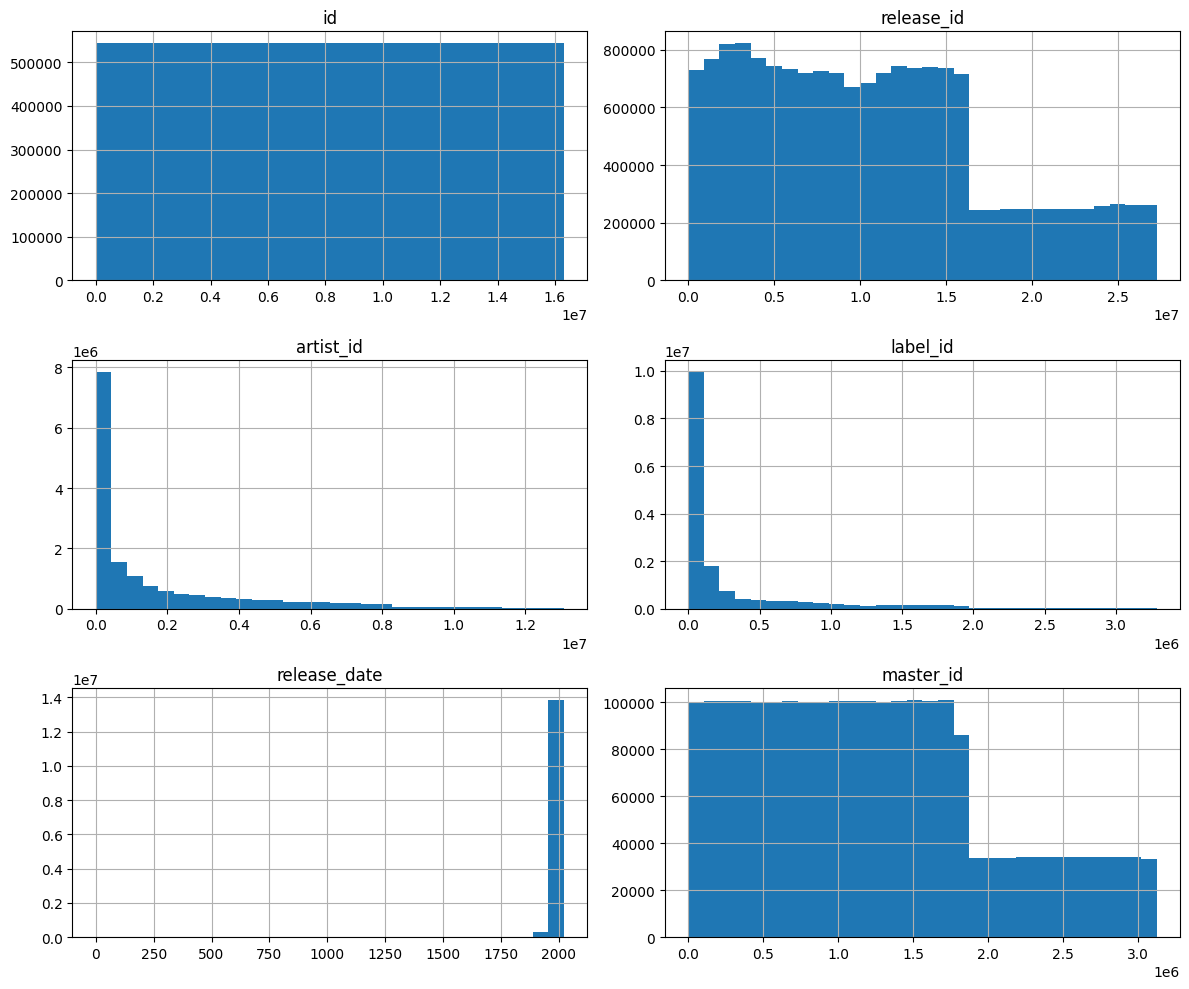

In [10]:
# Value counts of categorical features
for col in dataset.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':\n", dataset[col].value_counts().head(5))

# Histogram for numeric columns
dataset.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


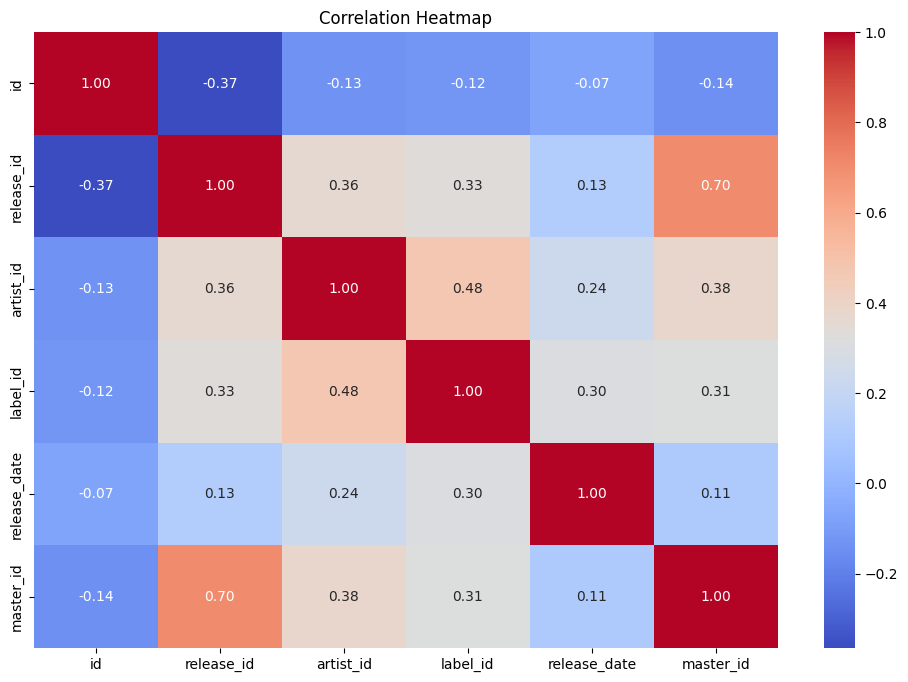

In [11]:
correlation = dataset.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


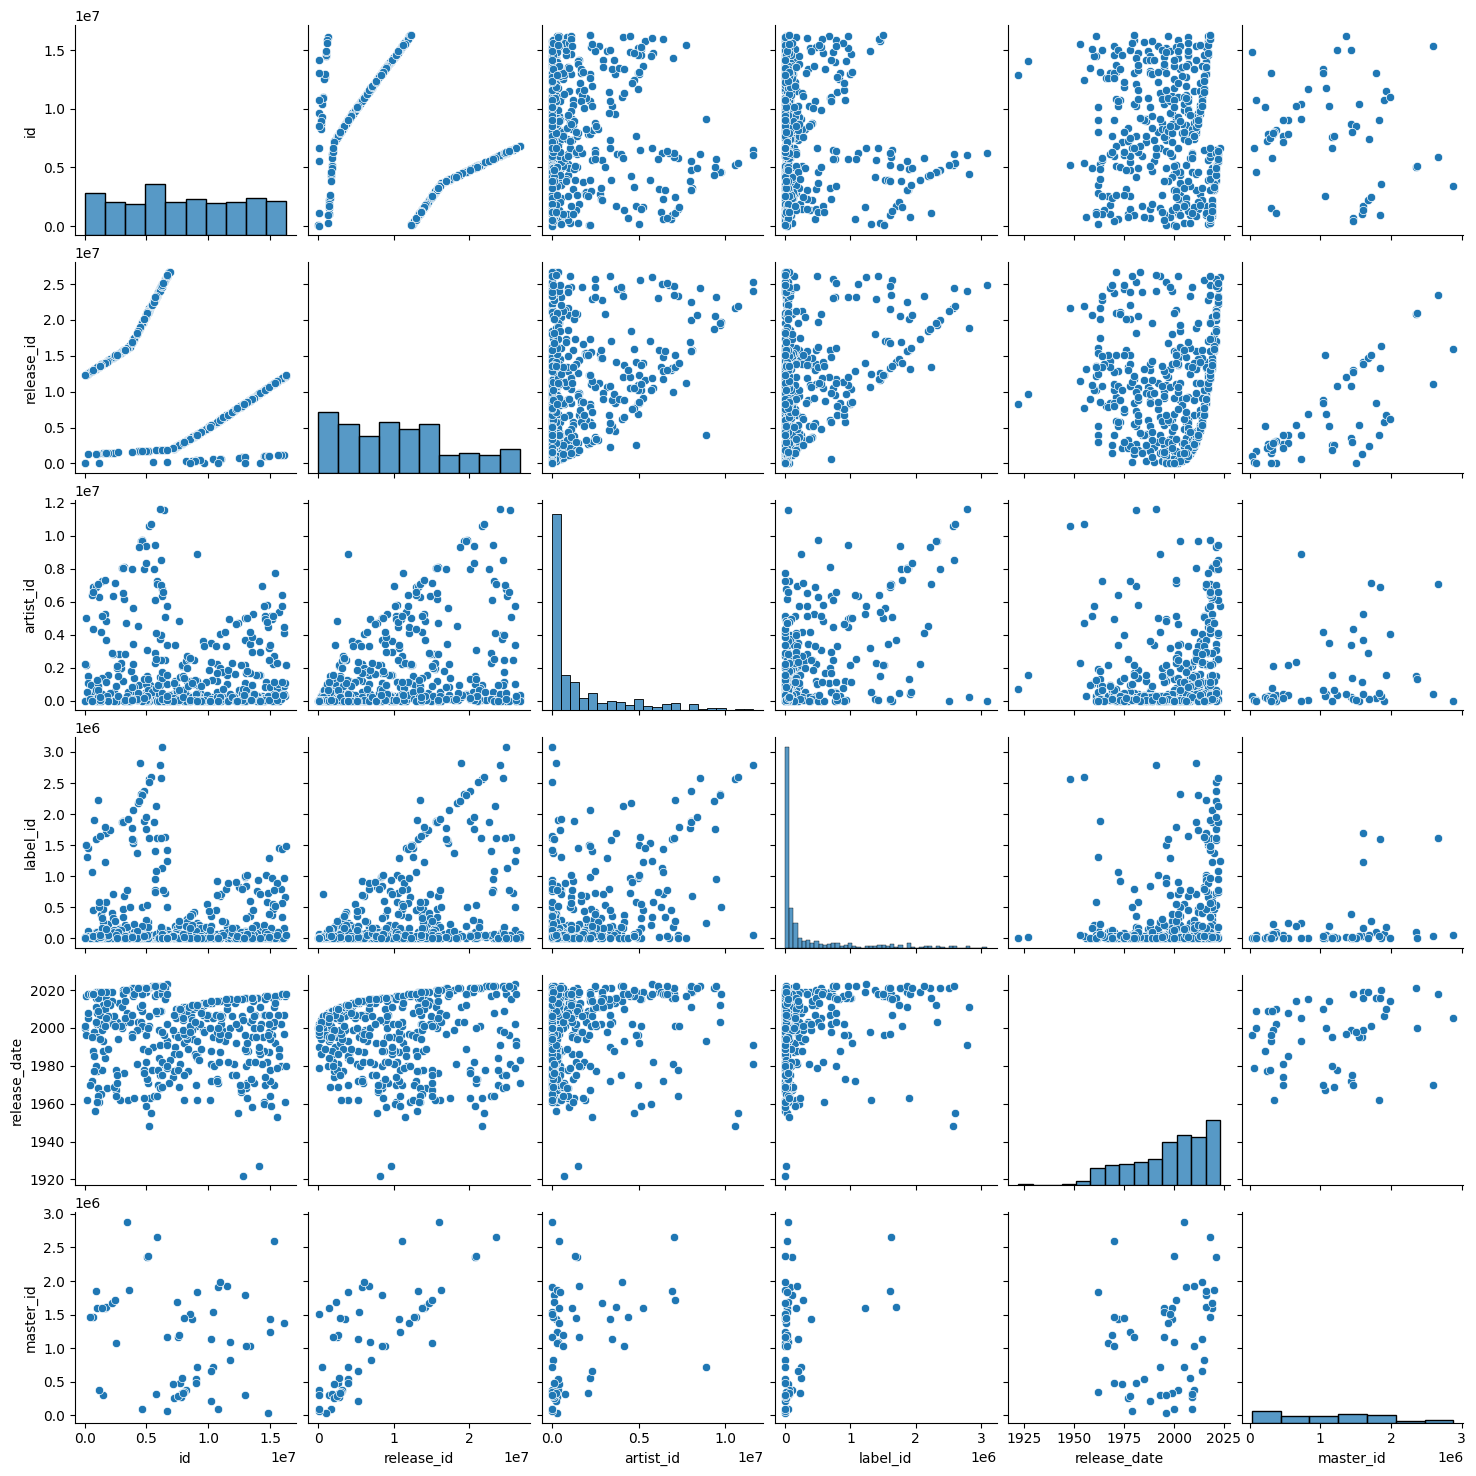

In [ ]:
# Pairplot (for small sample '500 rows')
# To avoid overplotting, we sample 500 rows if the dataset is rows is more than 1000
sampled = dataset.sample(500) if dataset.shape[0] > 1000 else dataset
sns.pairplot(sampled.select_dtypes(include=[np.number]))
plt.show()
